In [1]:
import gzip
import pickle
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline

In [8]:
fit = np.load(gzip.open('balanced_fit.npy.gz', 'rb'))
ordered_features = np.load(open('ordered_features', 'rb'))
num_features = len(ordered_features)
fit_df = pd.DataFrame(fit, columns=ordered_features + ['pos', 'error'])
num_samples = 80
del fit

/Users/tiagoantao/anaconda2/envs/p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12528c4e0>,
      dtype=object)

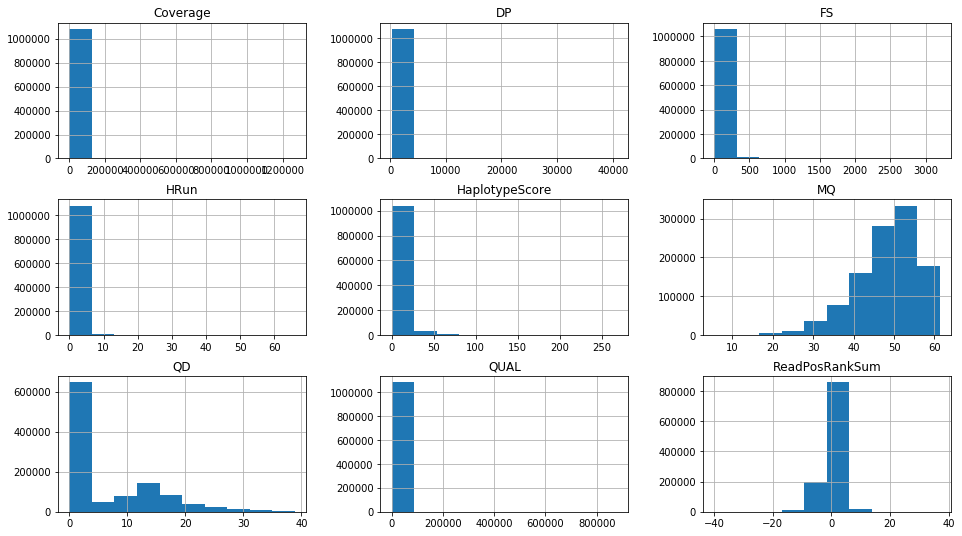

In [18]:
fig,ax = plt.subplots(figsize=(16,9))
fit_df.hist(column=ordered_features, ax=ax)

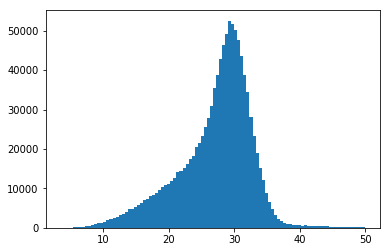

In [25]:
fit_df['MeanDP'] = fit_df['DP'] / 80
fig, ax = plt.subplots()
_ = ax.hist(fit_df[fit_df['MeanDP']<50]['MeanDP'], bins=100)

In [ ]:
errors_df = fit_df[fit_df['error'] == 1]
ok_df = fit_df[fit_df['error'] == 0]

In [53]:
ok_qual_above_df = ok_df[ok_df['QUAL']>0.005]
errors_qual_above_df = errors_df[errors_df['QUAL']>0.005]
print(ok_df.size, errors_df.size, ok_qual_above_df.size, errors_qual_above_df.size)
print(ok_qual_above_df.size / ok_df.size, errors_qual_above_df.size / errors_df.size)

5954157 5958568 444422 5604588
0.07464062502886638 0.9405931089483245


In [55]:
ok_qd_above_df = ok_df[ok_df['QD']>0.05]
errors_qd_above_df = errors_df[errors_df['QD']>0.05]
print(ok_df.size, errors_df.size, ok_qd_above_df.size, errors_qd_above_df.size)
print(ok_qd_above_df.size / ok_df.size, errors_qd_above_df.size / errors_df.size)

5954157 5958568 422752 5280264
0.07100115096058099 0.8861632526472804


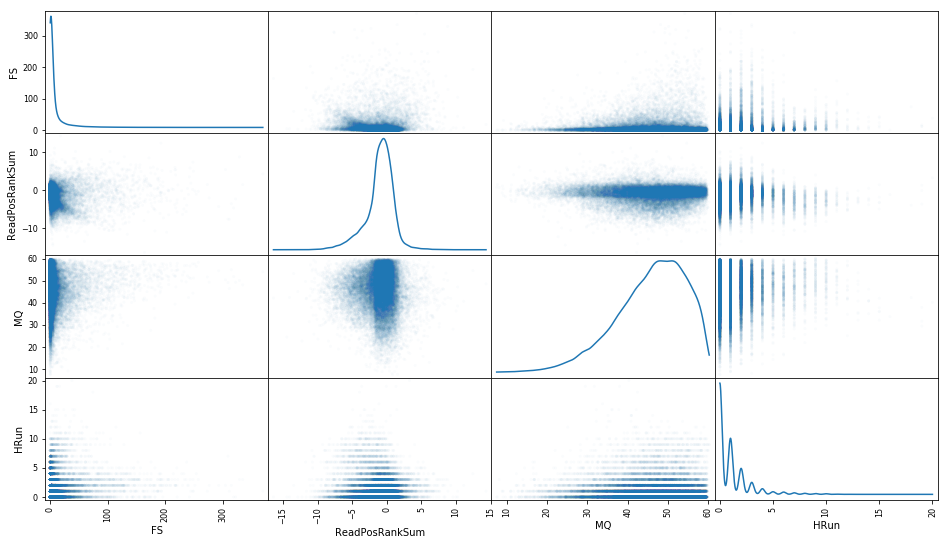

In [81]:
not_bad_area_errors_df = errors_df[(errors_df['QUAL']<0.005)&(errors_df['QD']<0.05)]
_ = scatter_matrix(not_bad_area_errors_df[['FS', 'ReadPosRankSum', 'MQ', 'HRun']], diagonal='kde', figsize=(16, 9), alpha=0.02)

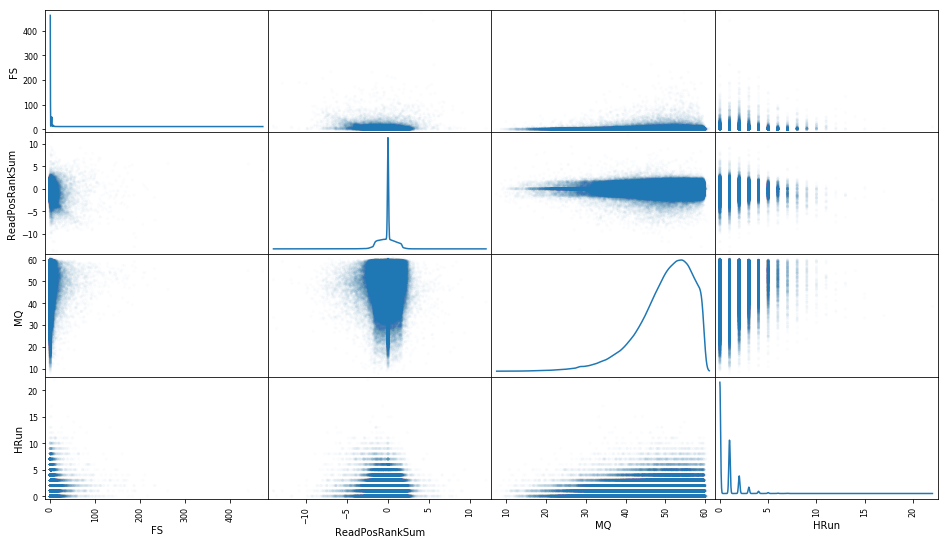

In [82]:
not_bad_area_ok_df = ok_df[(ok_df['QUAL']<0.005)&(ok_df['QD']<0.05)]
_ = scatter_matrix(not_bad_area_ok_df[['FS', 'ReadPosRankSum', 'MQ', 'HRun']], diagonal='kde', figsize=(16, 9), alpha=0.02)

In [91]:
all_fit_df = pd.DataFrame(np.load(gzip.open('feature_fit.npy.gz', 'rb')), columns=ordered_features + ['pos', 'error'])
potentially_good_corner_df = all_fit_df[(all_fit_df['QUAL']<0.005)&(all_fit_df['QD']<0.05)]
all_errors_df=all_fit_df[all_fit_df['error'] == 1]
print(len(all_fit_df), len(all_errors_df), len(all_errors_df) / len(all_fit_df))

10905732 541688 0.04967002673456491


In [92]:
potentially_good_corner_errors_df = potentially_good_corner_df[potentially_good_corner_df['error'] == 1]
print(len(potentially_good_corner_df), len(potentially_good_corner_errors_df), len(potentially_good_corner_errors_df) / len(potentially_good_corner_df))
print(len(potentially_good_corner_df)/len(all_fit_df))

9625754 32180 0.0033431147315836243


0.8826325458942141
